In [1]:
import openmc
openmc.config['cross_sections'] = '/home/antor/endfb-viii.0-hdf5/cross_sections.xml'

/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:


# Define materials
u233 = openmc.Material(name='U233')
u233.add_nuclide('U233', 1.0)
u233.set_density('g/cm3', 10.0)

u235 = openmc.Material(name='U235')
u235.add_nuclide('U235', 1.0)
u235.set_density('g/cm3', 10.0)

u238 = openmc.Material(name='U238')
u238.add_nuclide('U238', 1.0)
u238.set_density('g/cm3', 10.0)

zr90 = openmc.Material(name='Zr90')
zr90.add_nuclide('Zr90', 1.0)
zr90.set_density('g/cm3', 10.0)

pu238 = openmc.Material(name='Pu238')
pu238.add_nuclide('Pu238', 1.0)
pu238.set_density('g/cm3', 10.0)

pu239 = openmc.Material(name='Pu239')
pu239.add_nuclide('Pu239', 1.0)
pu239.set_density('g/cm3', 10.0)

pu240 = openmc.Material(name='Pu240')
pu240.add_nuclide('Pu240', 1.0)
pu240.set_density('g/cm3', 10.0)

pu241 = openmc.Material(name='Pu241')
pu241.add_nuclide('Pu241', 1.0)
pu241.set_density('g/cm3', 10.0)

pu242 = openmc.Material(name='Pu242')
pu242.add_nuclide('Pu242', 1.0)
pu242.set_density('g/cm3', 10.0)

# Fuel composition (U-Zr-Pu mixed metal fuel)
fuel = openmc.Material.mix_materials(
    [u233, u235, u238, zr90, pu238, pu239, pu240, pu241, pu242],
    [0.00002, 0.0016, 0.7984, 0.1, 0.00318, 0.05635, 0.0266, 0.00802, 0.00583],
    percent_type='wo'  # Using atom percent for fractions
)

fuel.id = 1
fuel.temperature = 900            ###########################################  use pre-defined temperatures
fuel.name = 'U_Zr_Pu_Mixed_Metal'
fuel.depletable = True


/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)


In [4]:
cladding= openmc.Material(material_id=2,name="15-15 Ti Steel")

cladding.add_element('C', 0.001, 'wo')
cladding.add_element('Mn', 0.0149, 'wo')
cladding.add_element('Si', 0.0052, 'wo')
cladding.add_element('P', 0.00041, 'wo')
cladding.add_element('Cr', 0.1595, 'wo')
cladding.add_element('Ni', 0.154, 'wo')
cladding.add_element('B', 0.00007, 'wo')
cladding.add_element('Mo', 0.012, 'wo')
cladding.add_element('Cu', 0.00026, 'wo')
cladding.add_element('V', 0.00036, 'wo')
cladding.add_element('Al', 0.64767, 'wo')
cladding.add_element('Ti', 0.001, 'wo')
cladding.add_element('Fe', 0.64767, 'wo')

cladding.set_density('g/cm3',8.0)
cladding.temperature = 600      ##################### same


/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)


In [6]:
reflector= openmc.Material(material_id=3,name="316L Steel")

reflector.add_element('Cr', 0.165, 'wo')
reflector.add_element('Ni', 0.13, 'wo')
reflector.add_element('Si', 0.005, 'wo')
reflector.add_element('P', 0.00045, 'wo')
reflector.add_element('C', 0.0003, 'wo')
reflector.add_element('Mn', 0.02, 'wo')
reflector.add_element('Mo', 0.025, 'wo')
reflector.add_element('N', 0.0011, 'wo')
reflector.add_element('S', 0.0002, 'wo')
reflector.add_element('Fe', 0.65295, 'wo')


/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)


In [8]:
coolant= openmc.Material(material_id=4,name="Lead-Bismuth-Eutectic Alloy Coolant")
coolant.add_element('Pb',0.455,'wo')
coolant.add_element('Bi',0.545,'wo')

coolant.set_density('g/cm3',10.24)
coolant.temperature = 294 ############################### same



/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)


In [10]:
#we don't added control rod here
# Create material library
materials = openmc.Materials([fuel, cladding, coolant])


# Export to XML
materials.export_to_xml('materials.xml')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

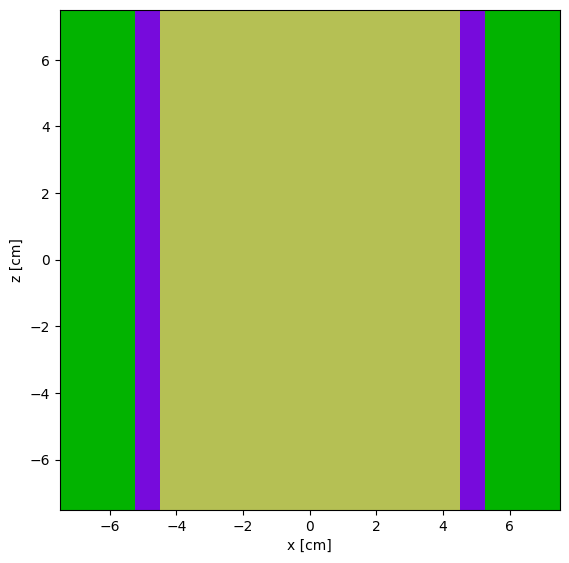

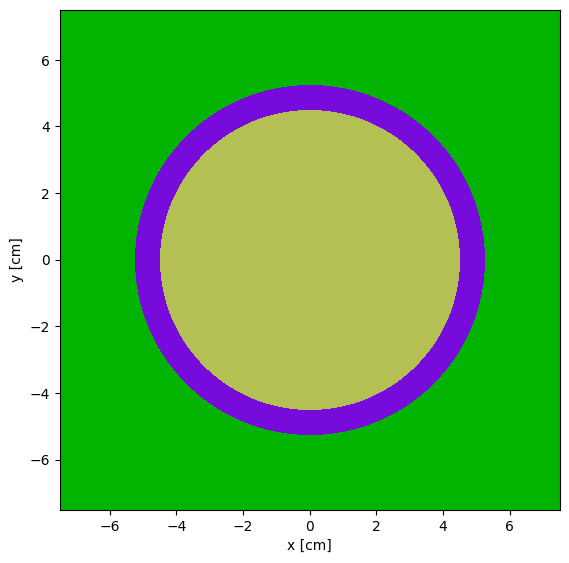

In [11]:

# Define surfaces
fuel_radius = openmc.ZCylinder(r=4.5 )                       #don't use boundary conditions in intermediary surfaces
clad_radius = openmc.ZCylinder(r=5.25)                      #don't use boundary conditions in intermediary surfaces
core_radius = openmc.ZCylinder(r=25)
ref_radius = openmc.ZCylinder(r=30, boundary_type='reflective')
top = openmc.ZPlane(z0=50, boundary_type='reflective')
bottom = openmc.ZPlane(z0=-50, boundary_type='reflective')

# Define cells
fuel_cell = openmc.Cell(cell_id=10, fill=fuel, region= -fuel_radius & -top & +bottom)
cladding_cell = openmc.Cell(cell_id=11, fill=cladding, region= +fuel_radius & -clad_radius & -top & +bottom)
core_cell = openmc.Cell(cell_id=12, fill=coolant, region=+clad_radius & -core_radius & -top & +bottom)
ref_cell = openmc.Cell(cell_id=13, fill=reflector, region=+core_radius & -ref_radius & -top & +bottom)
# Create universe
fuel_rod = openmc.Universe(cells=[fuel_cell, cladding_cell, core_cell, ref_cell])

fuel_rod.plot( origin= (0,0,0), pixels=(500,500), width= (30,30),  color_by='material', basis= 'xz')
fuel_rod.plot( origin= (0,0,0), pixels=(500,500), width= (30,30),  color_by='material', basis= 'xy')

In [12]:


# Create geometry
geometry = openmc.Geometry(fuel_rod)

# Export to XML
geometry.export_to_xml()


In [13]:
# Create a Settings object
settings = openmc.Settings()

# Set the number of batches and particles per batch
settings.batches = 30
settings.inactive= 5
settings.particles = 10000


# Export settings to XML
settings.export_to_xml()

In [14]:

openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################